In [26]:
import torch
from d2l import torch as d2l
import torch.distributions as distributions

# 进行$m=500$组实验，每组抽取$n=10$个样本。改变$m$和$n$，观察和分析实验结果。

In [27]:
fair_probs = torch.ones([6], dtype=torch.float32) / 6
m = distributions.multinomial.Multinomial(100, fair_probs)
counts = m.sample([10000])

进行10000组实验, 每组抽取100个样本

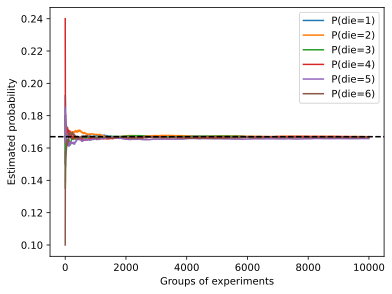

In [28]:
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();